In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.getcwd()
#os.listdir(os.getcwd())
os.chdir(r"C:\Users\Steffi\Desktop\Semester 2\Practical Skills for Researchers\Data\Pilot3\output_VS")

**Single subject**

In [15]:
data = pd.read_csv("data_visualsearch_pp_02.csv",sep='\t')

In [16]:
data

,Unnamed: 0,RT,flanker_presence,key_pressed,target_ecc,target_flank_ratio,target_orientation
0,0,1.358344,no flankers,right,4.0,0.80,left
1,1,0.983290,no flankers,right,8.0,0.80,right
2,2,1.358454,flankers,right,4.0,0.80,left
3,3,1.033434,flankers,left,4.0,0.80,left
4,4,0.933437,flankers,right,4.0,0.80,right
5,5,0.924908,flankers,right,8.0,0.80,right
6,6,0.891757,flankers,right,12.0,0.80,right
7,7,1.025179,flankers,left,12.0,0.80,left
8,8,1.008306,no flankers,right,4.0,0.80,right
9,9,1.058389,flankers,left,4.0,0.75,left


**Group of subjects**

In [7]:
all_files = ["data_visualsearch_pp_00.csv","data_visualsearch_pp_01.csv","data_visualsearch_pp_02.csv"]

subs = []    
for filename in all_files:
    a = pd.read_csv(filename, sep='\t')
    subs.append(a)
data_all = pd.concat(subs, ignore_index = True, sort=True)

**Compare Reaction Times**

In [18]:
mean_rts = np.zeros(len(all_files))

for i in range(len(all_files)):
    data_sub = pd.read_csv(all_files[i], sep='\t')
    rt = np.mean(data_sub["RT"])
    mean_rts[i]=rt

print(mean_rts)

[0.95831362 2.06849144 0.80970856]


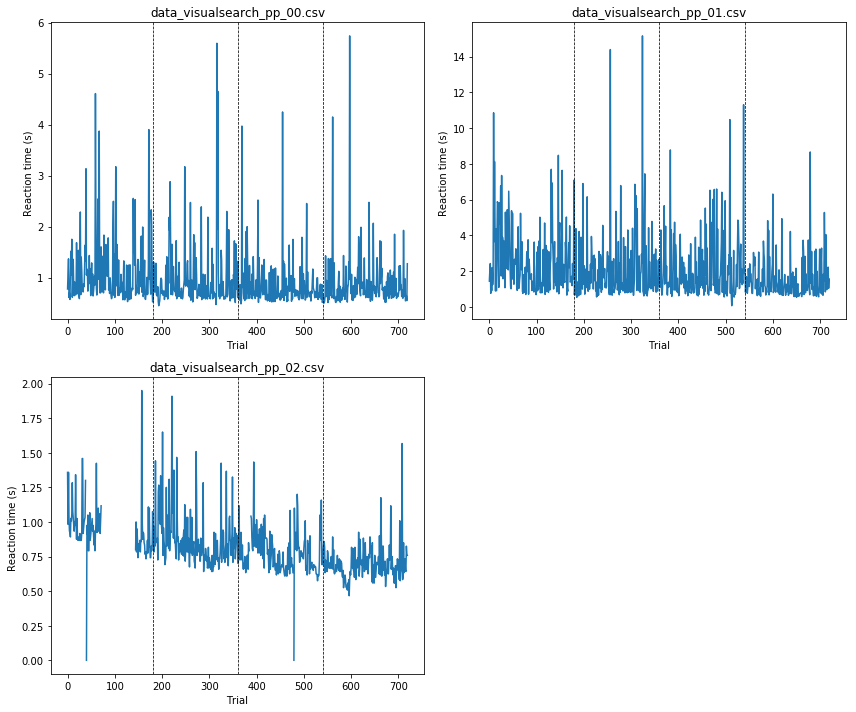

In [11]:
rows = (len(all_files)/2)+1
plt.figure(figsize=(12,rows*4))

for i in range(len(all_files)):
    data_sub = pd.read_csv(all_files[i], sep='\t')
    plt.subplot(rows,2,i+1)
    plt.plot(data_sub["RT"])
    plt.ylabel("Reaction time (s) ")
    plt.xlabel("Trial")
    plt.title(all_files[i])
    xposition = [180,360,540]
    for xc in xposition:
        plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.tight_layout()

**Compare Data per Block**

In [20]:
blocks = 4
trials_per_block = len(data)/blocks
block_separation=[0,180,360,540,720]

acc_block = np.zeros((blocks, len(all_files)))
mean_rt_block = np.zeros((blocks, len(all_files)))

for sub in range(len(all_files)):
    
    data_sub = pd.read_csv(all_files[sub], sep='\t')
    
    for b in range(blocks):
        
        acc = []
        rt = []
            
        for i in range(block_separation[b],block_separation[b+1]):
            if (data_sub['key_pressed'][i]=="right" and data_sub['target_orientation'][i]==5) or (data_sub['key_pressed'][i]=="left" and data_sub['target_orientation'][i]==355):
                acc.append(True)
            else:
                acc.append(False)
            
            rt.append(data_sub["RT"][i])
        
        acc_block[b,sub]=(float(sum(acc))/trials_per_block)
        mean_rt_block[b,sub]=(float(sum(rt))/len(rt))
        
print(acc_block)
print(mean_rt_block)

[[0.98888889 0.97777778 0.        ]
 [1.         0.96111111 0.        ]
 [1.         0.99444444 0.        ]
 [1.         0.99444444 0.        ]]
[[1.11132334 2.55470788        nan]
 [0.96832786 2.08508498 0.88043723]
 [0.86230856 2.08346261        nan]
 [0.89129471 1.55071028 0.69659819]]
